## **Data Preparation**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from google.colab import files
data = files.upload()

Saving heart.csv to heart (1).csv


In [ ]:
data = pd.read_csv('/content/heart.csv')

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
x = data[data.columns[:13]]
y = data['target']

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# **Exploratory Data Analysis**

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Text(0.5, 1.0, 'Korelasi Antara Variabel Variabel')

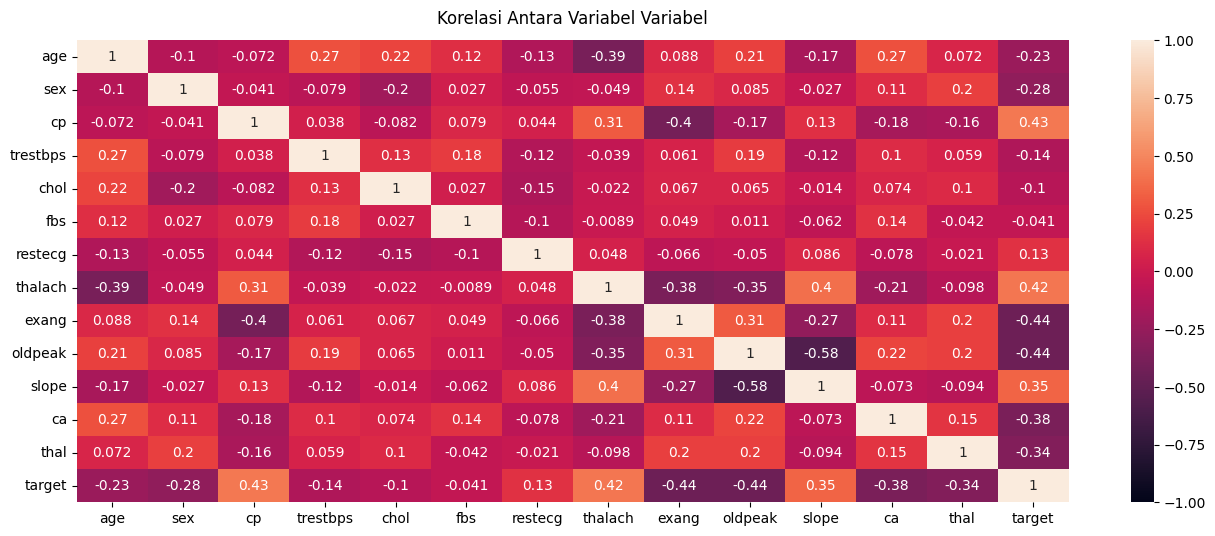

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmACin=-1, vmax=1, annot=True)
heatmap.set_title('Korelasi Antara Variabel Variabel', fontdict={'fontsize':12}, pad=12)

# **Data Prepocessing**

Pengecekan Data Kosong

In [ ]:
missing_data = data.isnull().sum()
print(missing_data)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Pengecekan Jumlah Kategori

In [ ]:
class_count_sex = data['sex'].nunique()
print("Jumlah kelas atau kategori [sex]:", class_count_sex)

Jumlah kelas atau kategori [sex]: 2


In [ ]:
class_count_cp = data['cp'].nunique()
print("Jumlah kelas atau kategori [cp]:", class_count_cp)

Jumlah kelas atau kategori [cp]: 4


In [ ]:
class_count_fbs = data['fbs'].nunique()
print("Jumlah kelas atau kategori [fbs]:", class_count_fbs)

Jumlah kelas atau kategori [fbs]: 2


In [ ]:
class_count_restecg = data['restecg'].nunique()
print("Jumlah kelas atau kategori [restecg]:", class_count_restecg)

Jumlah kelas atau kategori [restecg]: 3


In [ ]:
class_count_exang = data['exang'].nunique()
print("Jumlah kelas atau kategori [exang]:", class_count_exang)

Jumlah kelas atau kategori [exang]: 2


In [ ]:
class_count_slope = data['slope'].nunique()
print("Jumlah kelas atau kategori [slope]:", class_count_slope)

Jumlah kelas atau kategori [slope]: 3


In [ ]:
class_count_ca = data['ca'].nunique()
print("Jumlah kelas atau kategori [ca]:", class_count_ca)

Jumlah kelas atau kategori [ca]: 5


In [ ]:
class_count_thal = data['thal'].nunique()
print("Jumlah kelas atau kategori [thal]:", class_count_thal)

Jumlah kelas atau kategori [thal]: 4


In [ ]:
class_count_target = data['target'].nunique()
print("Jumlah kelas atau kategori [target]:", class_count_target)

Jumlah kelas atau kategori [target]: 2


Penghapusan Kategori Yang Tidak Sesuai

In [ ]:
nilai_yang_dihapus = 4
kolom_yang_dicek = 'ca'

data = data.loc[data[kolom_yang_dicek] != nilai_yang_dihapus]

In [ ]:
class_count_ca = data['ca'].nunique()
print("Jumlah kelas atau kategori [ca]:", class_count_ca)

Jumlah kelas atau kategori [ca]: 4


In [ ]:
nilai_yang_dihapus = 3
kolom_yang_dicek = 'thal'

data = data.loc[data[kolom_yang_dicek] != nilai_yang_dihapus]

In [ ]:
class_count_thal = data['thal'].nunique()
print("Jumlah kelas atau kategori [thal]:", class_count_thal)

Jumlah kelas atau kategori [thal]: 3


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1


Pengecekan Data Duplikat

In [ ]:
data.duplicated().sum()

421

Pengecekan Outlier

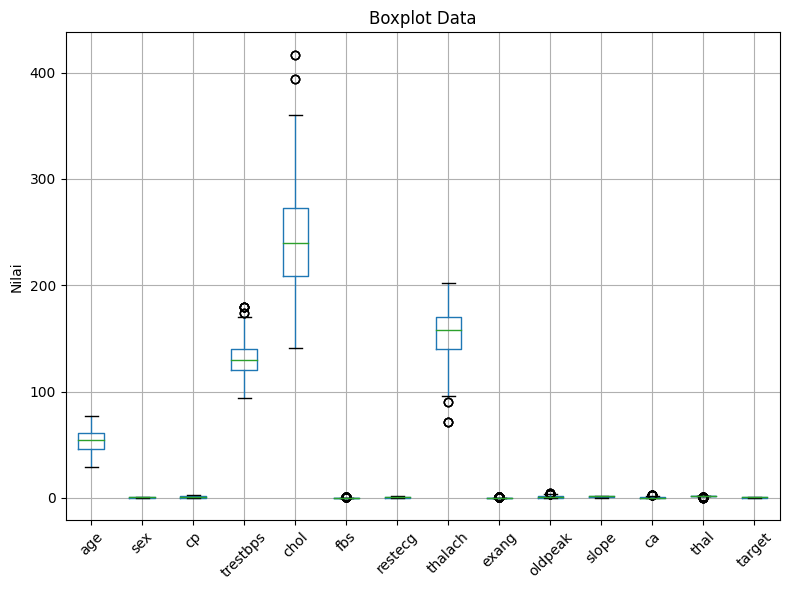

Data Outlier:
age           0
sex           0
cp            0
trestbps     10
chol          6
fbs          87
restecg       0
thalach       7
exang       137
oldpeak      18
slope         0
ca           28
thal         71
target        0
dtype: int64


In [ ]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 6))
data.boxplot()
plt.title('Boxplot Data')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print('Data Outlier:')
print(outliers)

Pengecekan Jumlah Data Target

In [ ]:
class_counts_target = data['target'].value_counts()
print(class_counts_target)

1    425
0    179
Name: target, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

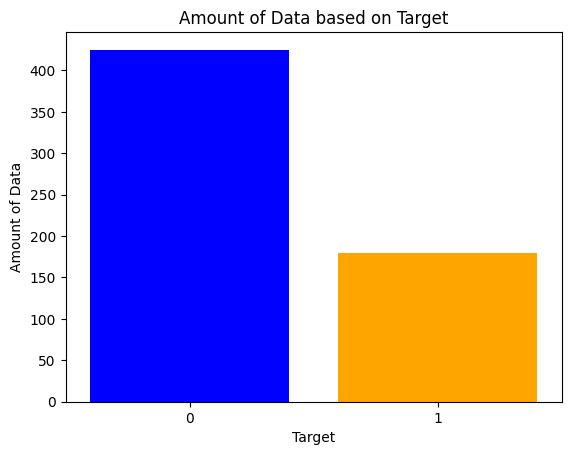

In [ ]:
count_target = data['target'].value_counts()

data['target'] = data['target'].astype('category')

plt.bar(data['target'].cat.categories, count_target.values, color=['blue', 'orange'])

plt.xticks([0, 1], ['0', '1'])
plt.xlim([-0.5, 1.5])

plt.title('Amount of Data based on Target')
plt.xlabel('Target')
plt.ylabel('Amount of Data')

plt.show

# **Data Processing**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# **Modelling Data**

SVM

In [ ]:
m1 = "SVM"

In [ ]:
clf = SVC()
clf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_clf = clf.predict(x_test)

accuracy1 = accuracy_score(y_test, y_pred_clf)
print("Akurasi Model:", accuracy1)

Akurasi Model: 0.887905604719764


Naive Bayes

In [ ]:
m2 = "Naive Bayes"

In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred_nb)
print("Akurasi Model:", accuracy2)

Akurasi Model: 0.8053097345132744


Random Forest


In [ ]:
m3 = "Random Forest"

In [ ]:
rf = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=7, min_samples_leaf=2, max_features="sqrt",random_state=2)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       random_state=2)

In [ ]:
y_pred_rf = rf.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred_rf)
print("Akurasi Model:", accuracy3)

Akurasi Model: 0.9498525073746312


# **Evaluasi**

SVM

In [ ]:
report1 = classification_report(y_test, y_pred_clf)
print("Classification Report:")
print(report1)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       171
           1       0.88      0.90      0.89       168

    accuracy                           0.89       339
   macro avg       0.89      0.89      0.89       339
weighted avg       0.89      0.89      0.89       339



In [ ]:
conf_matrix1 = confusion_matrix(y_test, y_pred_clf)
print("Confusion Matrix:")
print(conf_matrix1)

Confusion Matrix:
[[150  21]
 [ 17 151]]


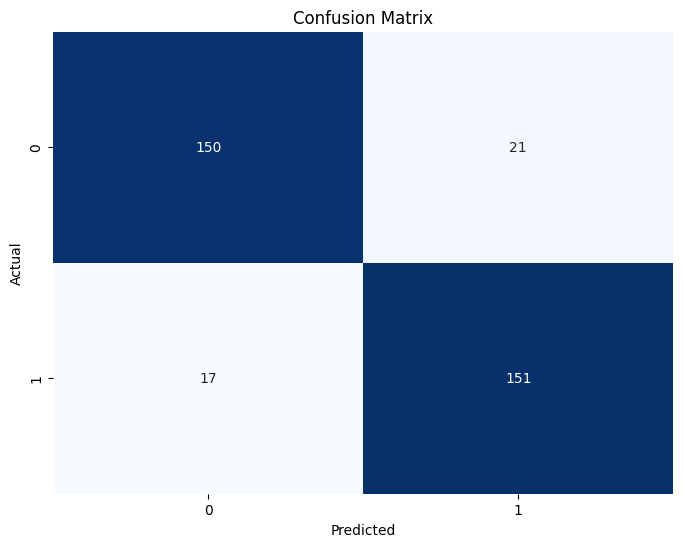

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Naive Bayes

In [ ]:
report2 = classification_report(y_test, y_pred_nb)
print("Classification Report:")
print(report2)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.80       171
           1       0.77      0.86      0.81       168

    accuracy                           0.81       339
   macro avg       0.81      0.81      0.80       339
weighted avg       0.81      0.81      0.80       339



In [ ]:
conf_matrix2 = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:")
print(conf_matrix2)

Confusion Matrix:
[[129  42]
 [ 24 144]]


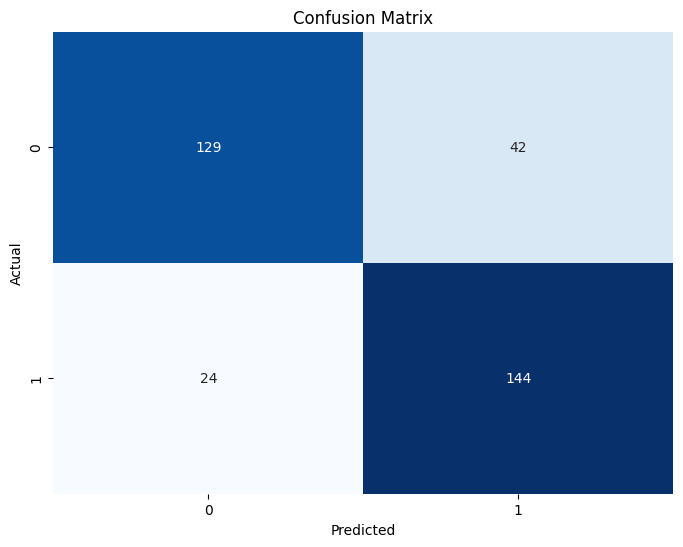

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [ ]:
report3 = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report3)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       171
           1       0.94      0.96      0.95       168

    accuracy                           0.95       339
   macro avg       0.95      0.95      0.95       339
weighted avg       0.95      0.95      0.95       339



In [ ]:
conf_matrix3 = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix3)

Confusion Matrix:
[[160  11]
 [  6 162]]


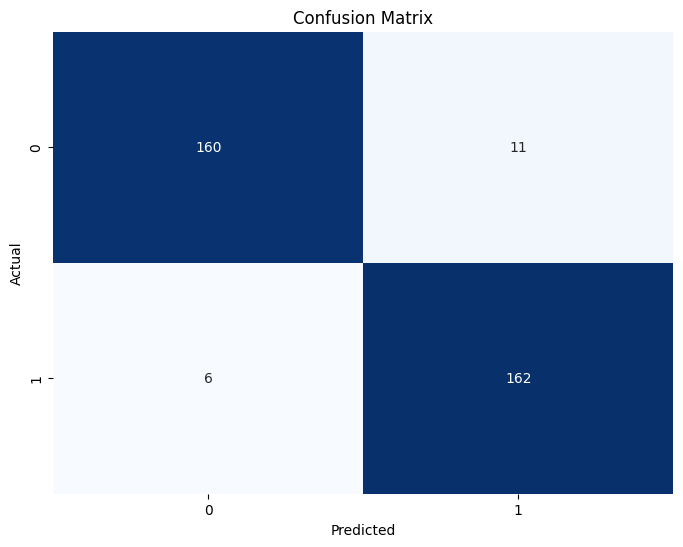

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Result

In [ ]:
results = {"Models": [m1, m2, m3],
           "Accuracy": [accuracy1, accuracy2, accuracy3]}

for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]


result_data=pd.DataFrame(results)

In [ ]:
result_data

,Models,Accuracy
0,SVM,88.790560
1,Naive Bayes,80.530973
2,Random Forest,94.985251


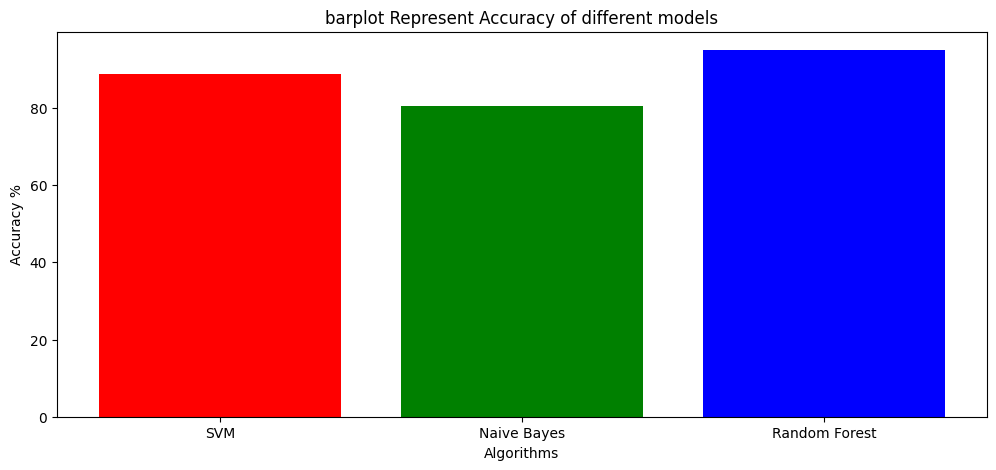

In [ ]:
colors = ['red','green','blue']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy %")
plt.bar(result_data['Models'],result_data['Accuracy'],color = colors)
plt.show()